## Output Handling

In Colaboratory the output of each cell is hosted in a separate iframe sandbox with limited access to the global notebook environment. APIs are available to enable some Python to Javascript and Javascript to Python communications, these APIs are generally only available for outputs which have been executed in the current session.



### Viewing Notebooks

Colaboratory attempts to provide a rich viewing experience where all resources needed to view outputs are persisted in the notebook itself and can be used for later viewing when not connected to a kernel.

In cases where outputs require execution to work properly this should be communicated to the user.

## display.Javascript to execute JavaScript from Python

The Javascript is persisted in the outputs of the notebook document and will be executed when the document is reloaded.

In [1]:
import IPython
js_code = '''
document.querySelector("#output-area").appendChild(document.createTextNode("hello world!"));
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

In [2]:
import cv2
import numpy as np
import tensorflow as tf

# Load a pre-trained image classification model
model = tf.keras.applications.MobileNetV2(weights='imagenet')

def classify_image(image):
    # Preprocess the image for the model
    image = cv2.resize(image, (224, 224))
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    image = np.expand_dims(image, axis=0)

    # Predict the class probabilities
    predictions = model.predict(image)
    return predictions

def detect_cracks(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Perform crack detection (simplified)
    # You would typically use more advanced computer vision techniques for this
    # Here, we'll just check if the image contains any cracks based on a classification model
    predictions = classify_image(image)

    # Set a threshold for crack detection
    threshold = 0.5

    if predictions.max() > threshold:
        return "Crack detected"
    else:
        return "No cracks detected"

# Example usage
image_path = '/content/WhatsApp Image 2023-09-23 at 21.06.44.jpg'
result = detect_cracks(image_path)
print(result)


1/1 [==============================] - 1s 718ms/step
No cracks detected


In [3]:
import cv2
import numpy as np

# Load the image
image_path = '/content/WhatsApp Image 2023-09-23 at 21.06.44.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply edge detection to identify potential cracks
edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)

# Find contours in the edges image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and check for cracks
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Adjust this threshold based on your specific case
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Display the original image with detected cracks
cv2.imshow('Crack Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


DisabledFunctionError: ignored

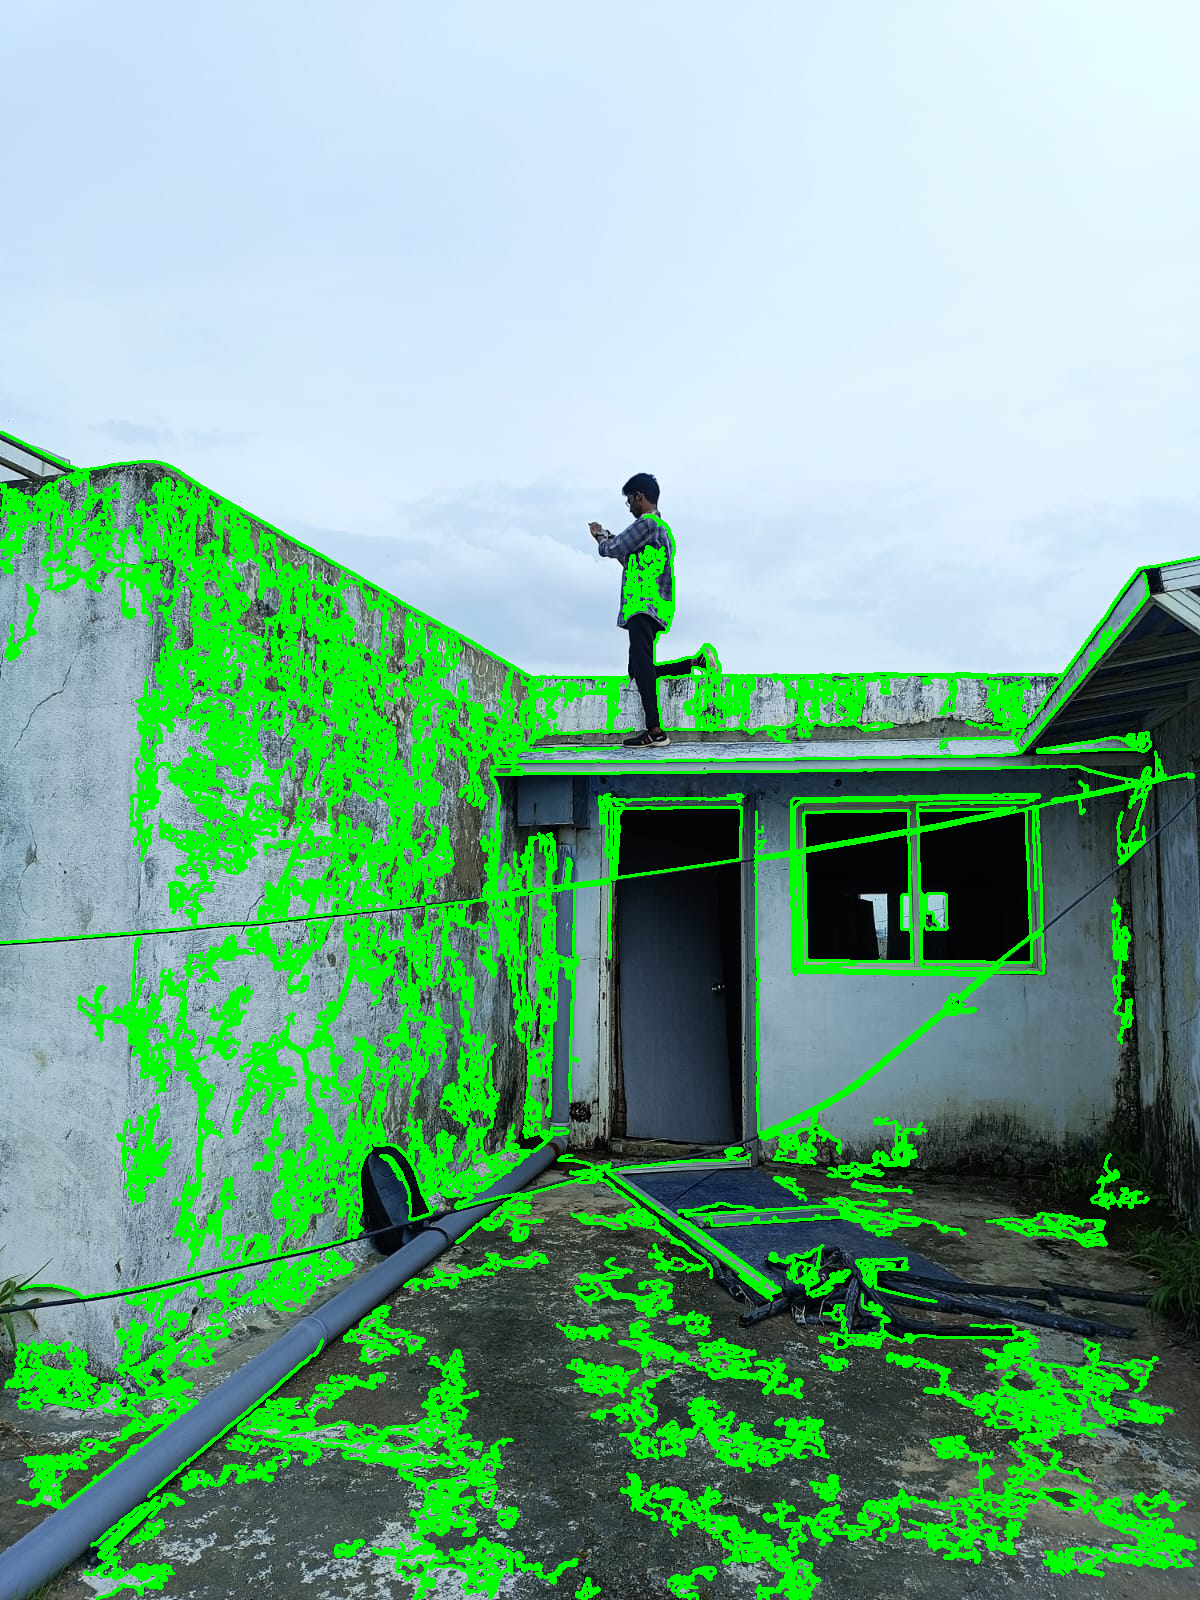

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Load the image
image_path = '/content/WhatsApp Image 2023-09-23 at 21.06.44.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply edge detection to identify potential cracks
edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)

# Find contours in the edges image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and check for cracks
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Adjust this threshold based on your specific case
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Display the original image with detected cracks using cv2_imshow
cv2_imshow(image)


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load a pre-trained CNN model (e.g., MobileNetV2)
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Define a function for damage detection
def detect_damage(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)

    # Make predictions using the pre-trained model
    predictions = model.predict(img)
    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=5)[0]

    # Check if there are predictions related to structural damage
    damage_keywords = ["crack", "damage", "deterioration", "deformation"]
    for _, label, score in decoded_predictions:
        for keyword in damage_keywords:
            if keyword in label.lower():
                return f"Structural damage detected: {label} (Confidence: {score:.2f})"

    return "No structural damage detected"

# Example usage
image_path = '/content/WhatsApp Image 2023-09-23 at 21.06.44.jpg'
result = detect_damage(image_path)
print(result)


35363/35363 [==============================] - 0s 0us/step
No structural damage detected
